## Introduction

This Python script conducts a comparison of different linkage methods in hierarchical clustering, using the Iris dataset as an example. Hierarchical clustering is a technique for grouping similar data points into clusters based on their proximity.

The script utilizes the **scipy.cluster.hierarchy.linkage** function to compute the linkage matrix for each specified method: Ward, Single, Complete, and Average. It then determines cluster labels using the fcluster function and creates 3D scatter plots to visualize the clustered data for each method.

By comparing the clustering results obtained with different linkage methods, we aim to understand how these methods affect the formation and structure of clusters in the Iris dataset. Additionally, the silhouette score is calculated for each method to evaluate the quality of the clustering results.

Through this comparative analysis, we seek to gain insights into the performance and suitability of various linkage methods for hierarchical clustering tasks, ultimately informing the selection of an appropriate method for future clustering endeavors.

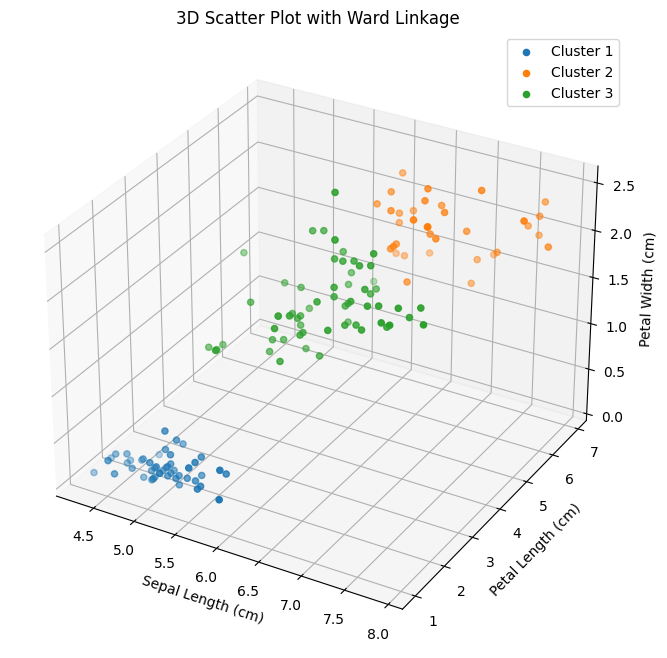

Silhouette Score for Ward Linkage: 0.539


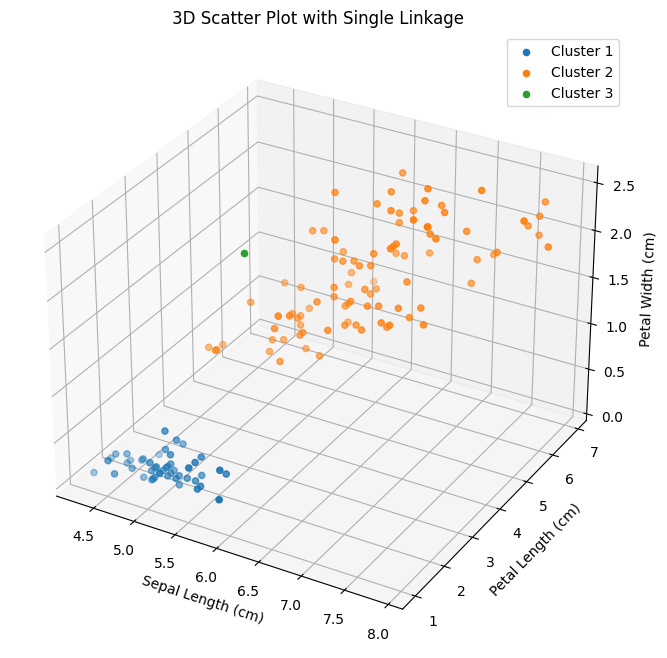

Silhouette Score for Single Linkage: 0.407


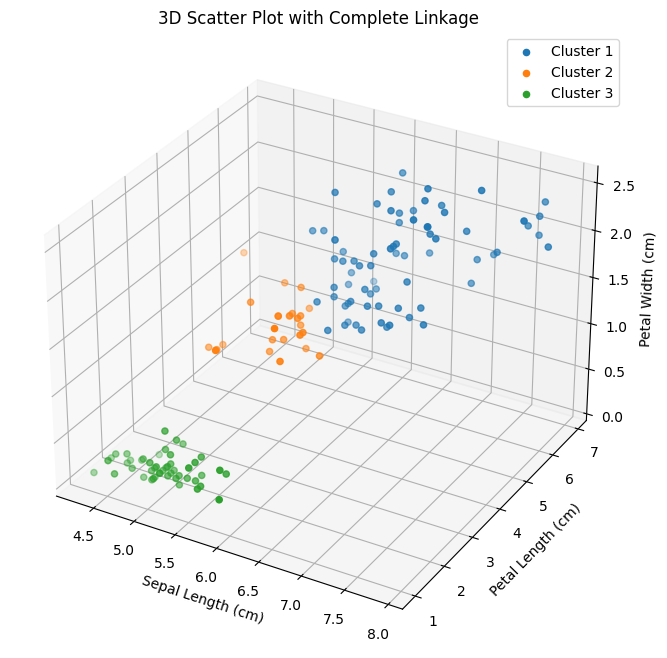

Silhouette Score for Complete Linkage: 0.501


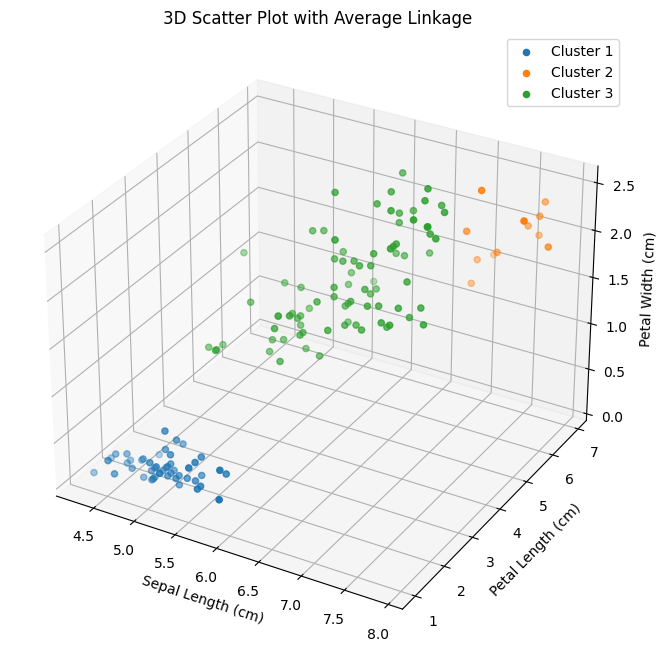

Silhouette Score for Average Linkage: 0.514


In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import pandas as pd

# Load the dataset
iris = load_iris()
Iris_data = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Select columns for clustering
X = Iris_data[["sepal length (cm)", "petal length (cm)", "petal width (cm)"]]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Compare different linkage methods
linkage_methods = ['ward', 'single', 'complete', 'average']

for method in linkage_methods:
    # Compute the linkage matrix
    linked = linkage(X_scaled, method=method)

    # Determine cluster labels
    n_clusters = 3
    cluster_labels = fcluster(linked, n_clusters, criterion='maxclust')

  

    # Create a 3D scatter plot with different colors for each cluster
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    for cluster in range(1, n_clusters + 1):
        ax.scatter(X.values[cluster_labels == cluster, 0],
                   X.values[cluster_labels == cluster, 1],
                   X.values[cluster_labels == cluster, 2],
                   label=f'Cluster {cluster}')

    # Set plot labels and legend
    ax.set_xlabel("Sepal Length (cm)")
    ax.set_ylabel("Petal Length (cm)")
    ax.set_zlabel("Petal Width (cm)")
    ax.set_title(f"3D Scatter Plot with {method.capitalize()} Linkage")
    ax.legend()
    plt.show()
    # Calculate silhouette score
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    print(f'Silhouette Score for {method.capitalize()} Linkage: {silhouette_avg:.3f}')